In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heartdisease.csv')
data

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


# Exploratory Data Analysis

In [3]:
data.shape

(199, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
63     199 non-null int64
1      199 non-null int64
4      199 non-null int64
140    199 non-null object
260    199 non-null object
0      199 non-null object
1.1    199 non-null int64
112    199 non-null object
1.2    199 non-null object
3      199 non-null object
2      199 non-null object
?      199 non-null object
?.1    199 non-null object
2.1    199 non-null int64
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


In [5]:
data.isnull().sum()

63     0
1      0
4      0
140    0
260    0
0      0
1.1    0
112    0
1.2    0
3      0
2      0
?      0
?.1    0
2.1    0
dtype: int64

In [6]:
list=['140','260','0','112','1.2','3','2','?','?.1']
for i in list:
    data[i]=data[i].str.replace('?','0')

In [7]:
list=['140','260','0','112','1.2','3','2','?','?.1']
for i in list:
    data[i]=data[i].astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
63     199 non-null int64
1      199 non-null int64
4      199 non-null int64
140    199 non-null float64
260    199 non-null float64
0      199 non-null float64
1.1    199 non-null int64
112    199 non-null float64
1.2    199 non-null float64
3      199 non-null float64
2      199 non-null float64
?      199 non-null float64
?.1    199 non-null float64
2.1    199 non-null int64
dtypes: float64(9), int64(5)
memory usage: 21.9 KB


In [9]:
Data=data.rename(columns={'63':'Age','1':'Sex','4':'CP','140':'Trestbps','260':'chols','0':'fbs','1.1':'restecg','112':'thalach','1.2':'exang','3':'oldpeak','2':'slope','?':'ca','?.1':'thal','2.1':'num'})
Data

,Age,Sex,CP,Trestbps,chols,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0.0,0.0,0.0,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0,0.0,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0,0.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0,0.0,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,0.0,0.0,0.0,1
195,62,1,1,0.0,139.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,0.0,0.0,6.0,2
197,58,1,4,0.0,385.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
Data.num.value_counts()

1    56
0    51
3    42
2    40
4    10
Name: num, dtype: int64

In [11]:
Data.Sex.value_counts()

1    193
0      6
Name: Sex, dtype: int64

In [12]:
Data.CP.value_counts()

4    130
3     47
2     14
1      8
Name: CP, dtype: int64

In [13]:
Data.fbs.value_counts()

0.0    131
1.0     68
Name: fbs, dtype: int64

In [14]:
Data.restecg.value_counts()

1    92
0    80
2    27
Name: restecg, dtype: int64

In [15]:
Data.exang.value_counts()

0.0    105
1.0     94
Name: exang, dtype: int64

In [16]:
Data.slope.value_counts()

0.0    102
2.0     52
3.0     29
1.0     16
Name: slope, dtype: int64

In [17]:
Data.ca.value_counts()

0.0    199
Name: ca, dtype: int64

In [18]:
Data.thal.value_counts()

0.0    165
7.0     22
6.0      8
3.0      4
Name: thal, dtype: int64

Checking for Outliers

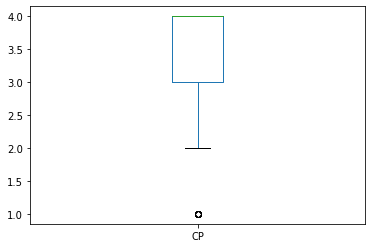

In [19]:
Data.CP.plot.box()

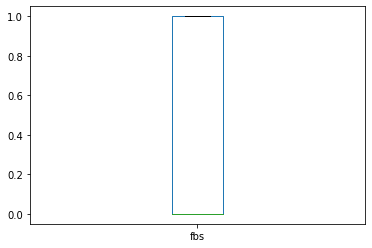

In [20]:
Data.fbs.plot.box()

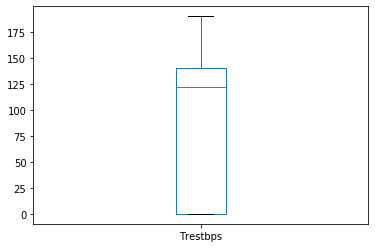

In [21]:
Data.Trestbps.plot.box()

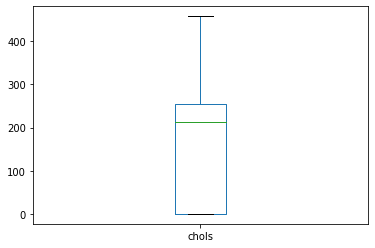

In [22]:
Data.chols.plot.box()

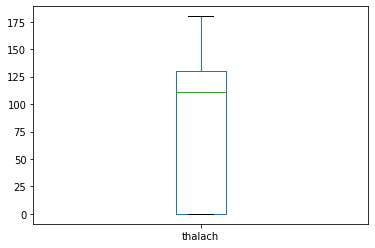

In [23]:
Data.thalach.plot.box()

In [24]:
#There is no outliers in the Dataset

Checking for Skewness

In [25]:
Data.skew()

Age        -0.397178
Sex        -5.537073
CP         -1.641267
Trestbps   -0.742397
chols      -0.461558
fbs         0.672579
restecg     0.396540
thalach    -0.709355
exang       0.111565
oldpeak     0.838673
slope       0.479716
ca          0.000000
thal        1.897022
num         0.302681
dtype: float64

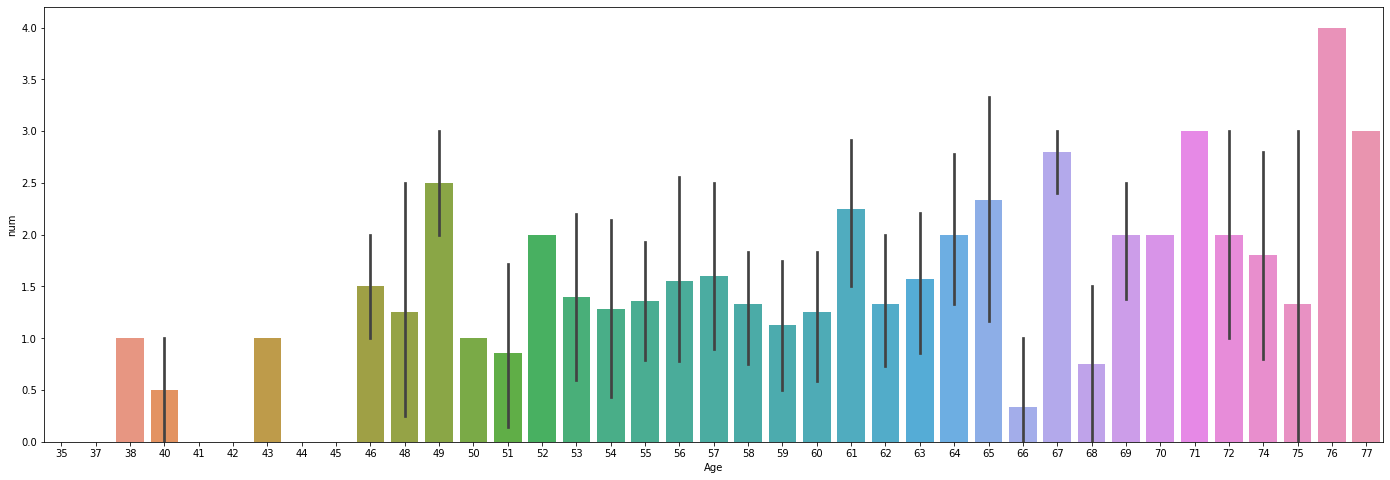

In [26]:
plt.figure(figsize=(24,8))
sns.barplot(x='Age',y='num',data=Data)

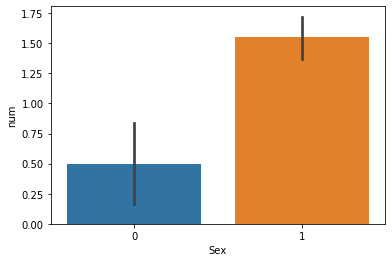

In [27]:
sns.barplot(x='Sex',y='num',data=Data)

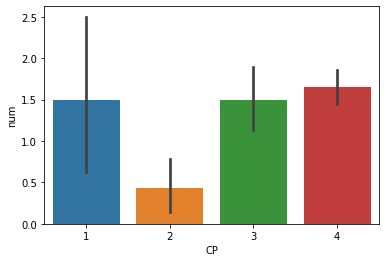

In [28]:
sns.barplot(x='CP',y='num',data=Data)

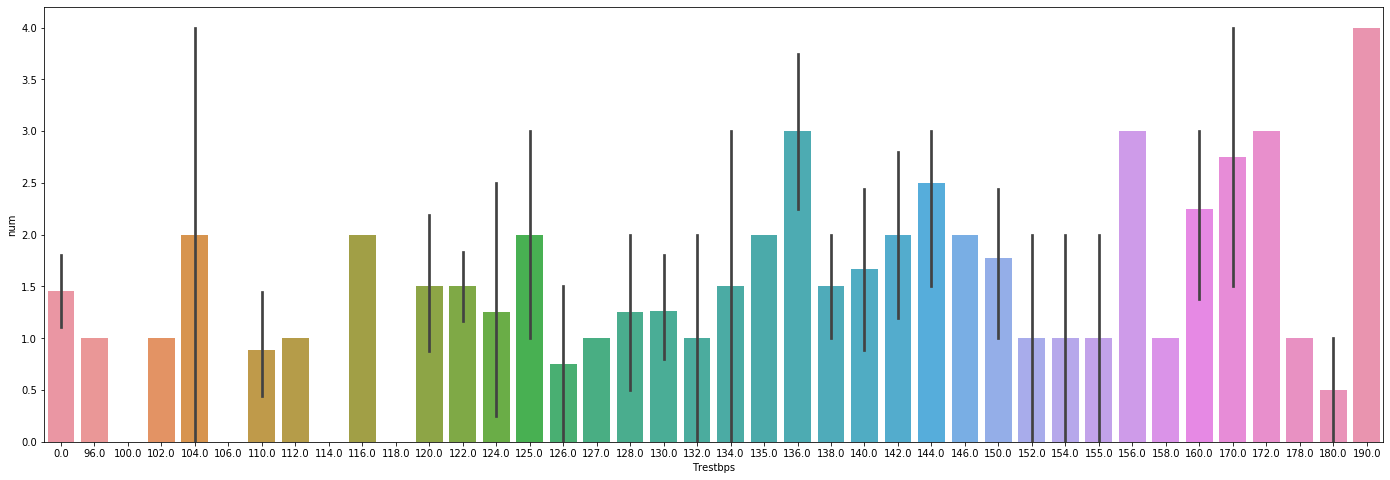

In [29]:
plt.figure(figsize=(24,8))
sns.barplot(x='Trestbps',y='num',data=Data)

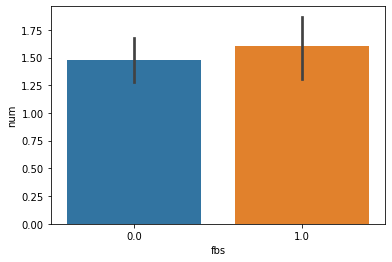

In [30]:
sns.barplot(x='fbs',y='num',data=Data)

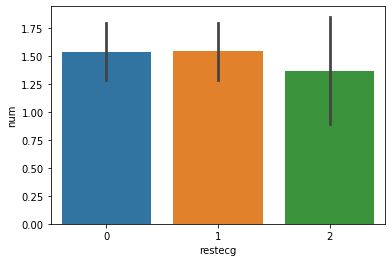

In [31]:
sns.barplot(x='restecg',y='num',data=Data)

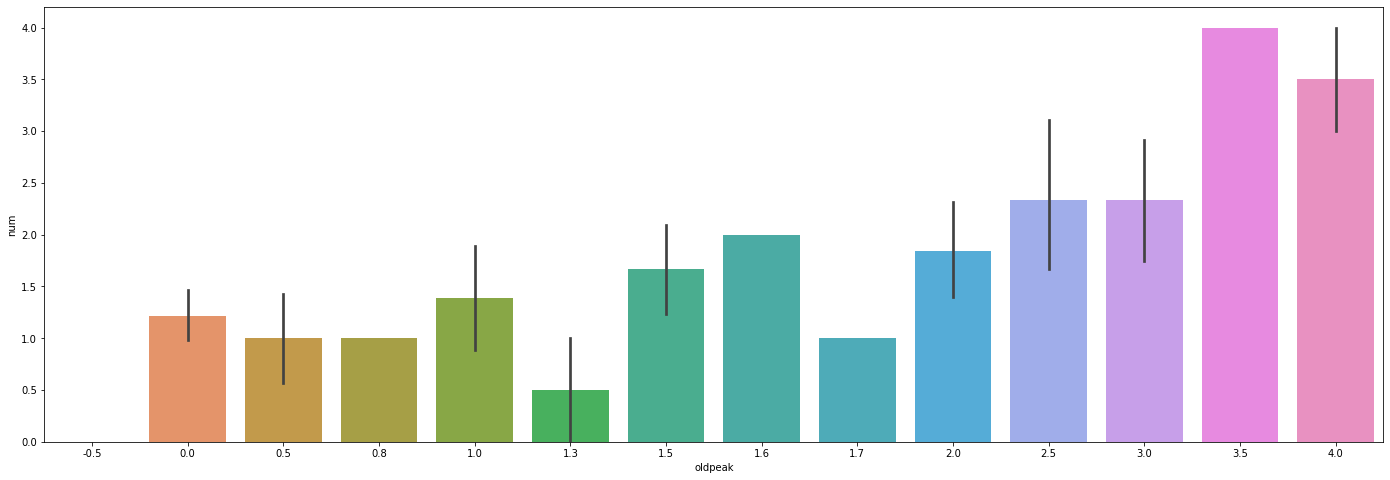

In [32]:
plt.figure(figsize=(24,8))
sns.barplot(x='oldpeak',y='num',data=Data)

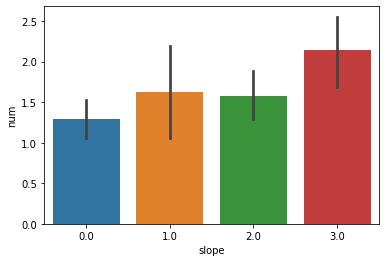

In [33]:
sns.barplot(x='slope',y='num',data=Data)

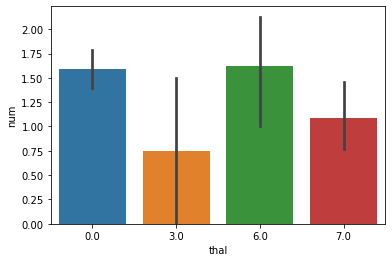

In [34]:
sns.barplot(x='thal',y='num',data=Data)

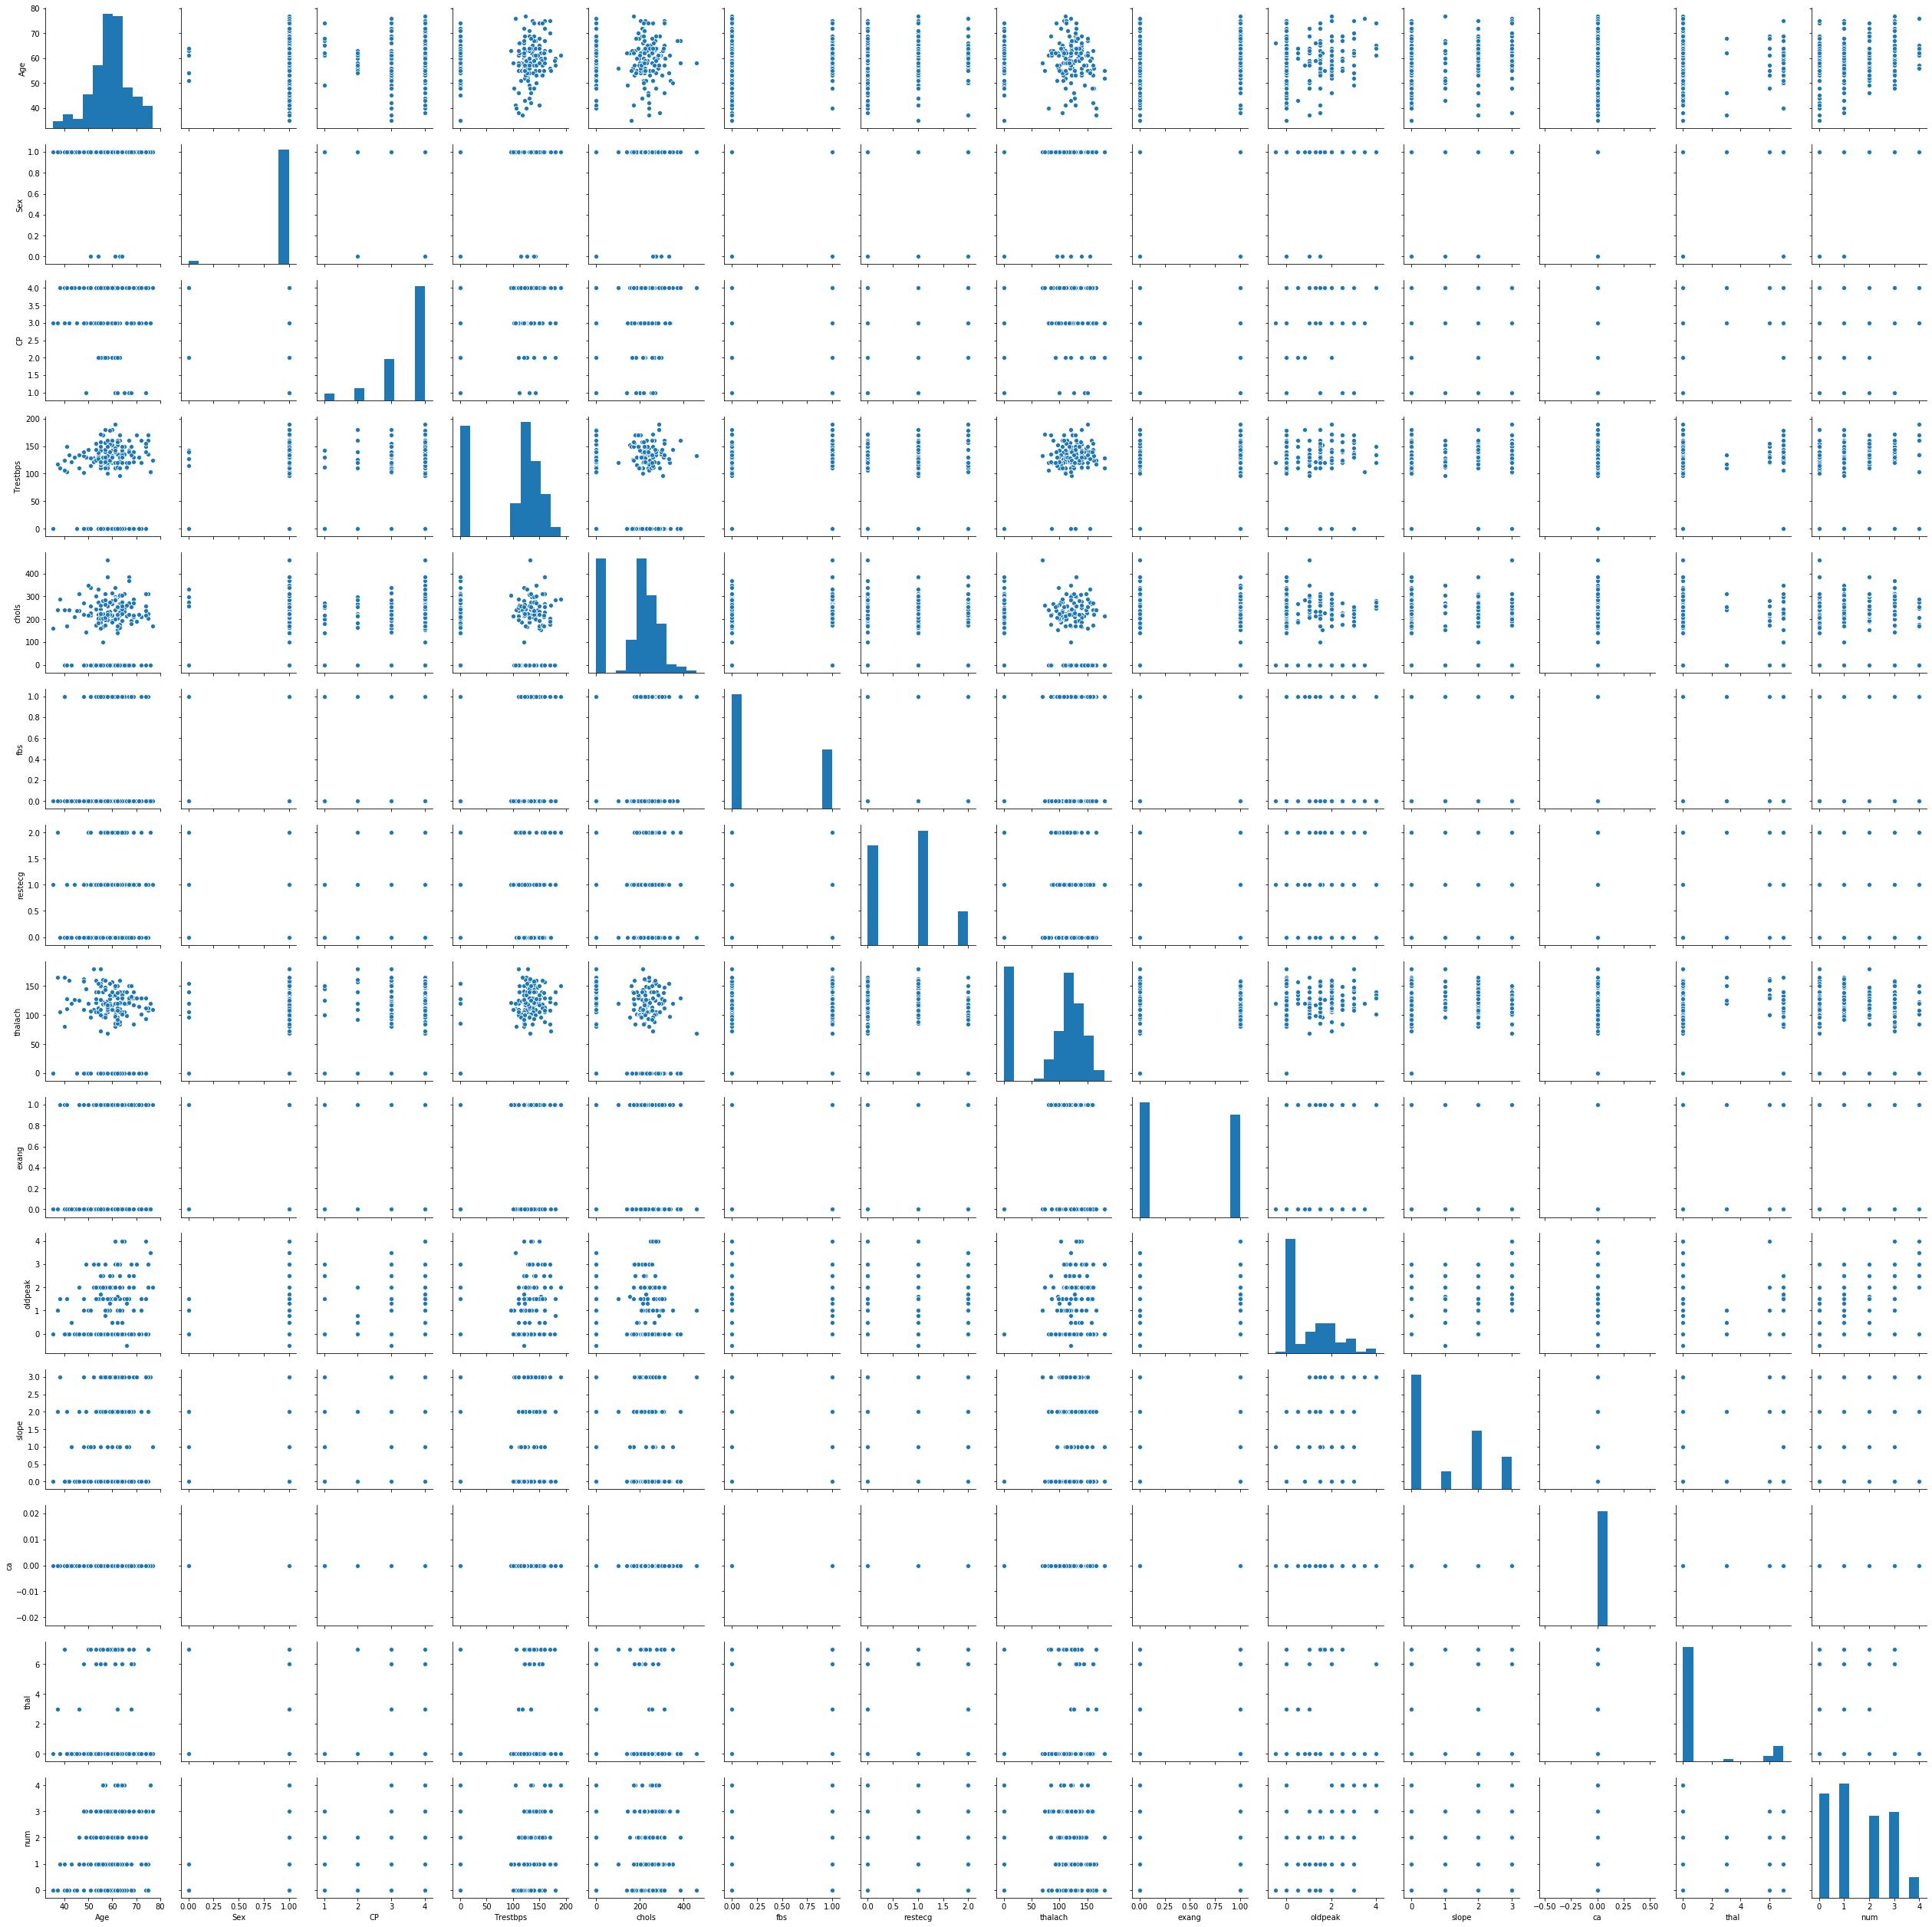

In [35]:
sns.pairplot(Data)

Checking for Correlation

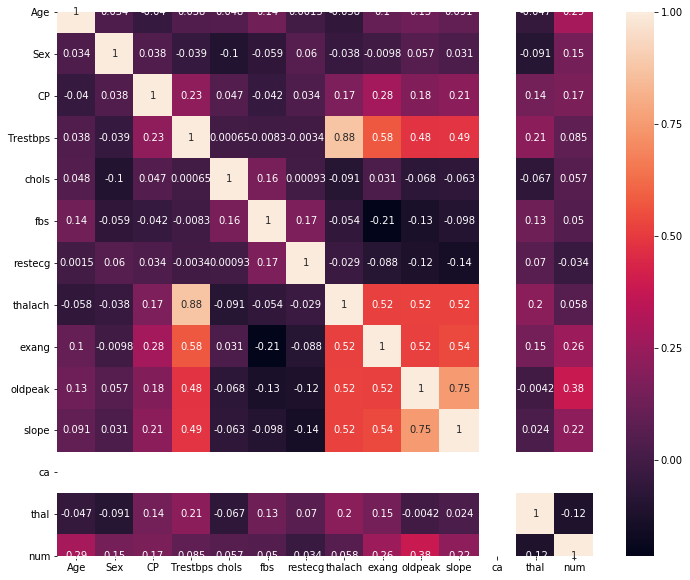

In [36]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [37]:
#droping Redundant feature
Data=Data.drop(['ca'],axis=1)
Data

,Age,Sex,CP,Trestbps,chols,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0.0,0.0,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,0.0,0.0,1
195,62,1,1,0.0,139.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,0.0,6.0,2
197,58,1,4,0.0,385.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0


In [38]:
#Checking Negative Value
a=(Data<0).all
a

<bound method DataFrame.all of        Age    Sex     CP  Trestbps  chols    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
194  False  False  False     False  False  False    False    False  False   
195  False  False  False     False  False  False    False    False  False   
196  False  False  False     False  False  False    False    False  False   
197  False  False  False     False  False  False    False    False  False   
198  False  False  False     False  False  False    False    False  False   

     oldpeak  slope   thal    num  
0      F

In [39]:
min(Data.oldpeak)

-0.5

In [40]:
Data=Data.drop(4)
Data
#We are droping 4th observaltion as it has -ve value in oldpeak column

,Age,Sex,CP,Trestbps,chols,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0.0,0.0,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0,0
5,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,0.0,0.0,1
195,62,1,1,0.0,139.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,0.0,6.0,2
197,58,1,4,0.0,385.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0


In [41]:
x=Data.iloc[:,0:-1]
x

,Age,Sex,CP,Trestbps,chols,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0.0,0.0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0
5,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,0.0,0.0
195,62,1,1,0.0,139.0,0.0,1,0.0,0.0,0.0,0.0,0.0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,0.0,6.0
197,58,1,4,0.0,385.0,1.0,2,0.0,0.0,0.0,0.0,0.0


In [42]:
y=Data.iloc[:,-1].values.reshape(-1,1)
y

array([[0],
       [2],
       [1],
       [0],
       [3],
       [0],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [4],
       [1],
       [0],
       [0],
       [2],
       [1],
       [3],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [0],
       [1],
       [0],
       [3],
       [1],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [3],
       [0],
       [1],
       [0],
       [2],
       [1],
       [4],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [3],
       [3],
       [1],
       [2],
       [3],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [4],
    

# Machine Learning

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
max_acc_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.30)
    mnb=MultinomialNB()
    mnb.fit(train_x,train_y)
    pred=mnb.predict(test_x)
    acc_scr=accuracy_score(pred,test_y)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        Final_r_state=r_state
    print('Max accuracy score corresponding to ',Final_r_state,' is ',max_acc_scr)    

Max accuracy score corresponding to  42  is  0.16666666666666666
Max accuracy score corresponding to  43  is  0.18333333333333332
Max accuracy score corresponding to  44  is  0.21666666666666667
Max accuracy score corresponding to  44  is  0.21666666666666667
Max accuracy score corresponding to  44  is  0.21666666666666667
Max accuracy score corresponding to  47  is  0.26666666666666666
Max accuracy score corresponding to  47  is  0.26666666666666666
Max accuracy score corresponding to  47  is  0.26666666666666666
Max accuracy score corresponding to  47  is  0.26666666666666666
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corresponding to  51  is  0.3
Max accuracy score corr

In [44]:
#Checking if the abov model is over or underfitting
a_score=cross_val_score(mnb,x,y,cv=5)
print(a_score)
print(np.mean(a_score))

[0.17073171 0.375      0.17948718 0.28205128 0.28205128]
0.25786429018136336


In [45]:
#Final mnb
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=88,test_size=0.30)
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnpred=mnb.predict(test_x)
print('Prediction',mnpred)

Prediction [0 2 0 0 2 1 4 2 0 0 2 2 0 2 0 3 2 2 0 2 2 1 2 2 2 4 2 3 2 2 0 2 3 0 3 2 3
 0 0 3 2 2 3 1 2 2 3 0 0 1 2 3 1 0 2 2 2 2 2 0]


In [46]:
print('Accuracy score',accuracy_score(mnpred,test_y))
print('Confusion Matrix  \n',confusion_matrix(mnpred,test_y))
print('Classification Report \n',classification_report(mnpred,test_y))

Accuracy score 0.31666666666666665
Confusion Matrix  
 [[ 5  5  3  2  1]
 [ 0  3  1  1  0]
 [ 5 11  9  2  1]
 [ 1  4  2  1  1]
 [ 0  0  0  1  1]]
Classification Report 
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.13      0.60      0.21         5
           2       0.60      0.32      0.42        28
           3       0.14      0.11      0.12         9
           4       0.25      0.50      0.33         2

    accuracy                           0.32        60
   macro avg       0.32      0.37      0.29        60
weighted avg       0.44      0.32      0.34        60



In [47]:
from sklearn.svm import SVC
def svkernel(ker):
    sv=SVC(kernel=ker)
    sv.fit(train_x,train_y)
    svpred=sv.predict(test_x)
    print('Prediction',svpred)
    print('\n')
    a_scr= cross_val_score(sv,x,y)
    print('A_score',a_score)
    print('\n')
    print('Mean of A_score',np.mean(a_score))
    print('Accuracy score',accuracy_score(mnpred,test_y))
    print('Confusion Matrix  \n',confusion_matrix(mnpred,test_y))
    print('Classification Report \n',classification_report(mnpred,test_y))  

In [49]:
svkernel('linear')

Prediction [0 3 1 0 0 1 0 0 1 0 2 1 1 2 3 3 3 2 3 0 3 0 2 2 1 2 3 0 1 2 1 0 3 0 1 0 0
 1 0 3 0 1 3 2 1 0 3 0 0 1 3 1 1 0 0 2 0 1 3 3]


A_score [0.17073171 0.375      0.17948718 0.28205128 0.28205128]


Mean of A_score 0.25786429018136336
Accuracy score 0.31666666666666665
Confusion Matrix  
 [[ 5  5  3  2  1]
 [ 0  3  1  1  0]
 [ 5 11  9  2  1]
 [ 1  4  2  1  1]
 [ 0  0  0  1  1]]
Classification Report 
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.13      0.60      0.21         5
           2       0.60      0.32      0.42        28
           3       0.14      0.11      0.12         9
           4       0.25      0.50      0.33         2

    accuracy                           0.32        60
   macro avg       0.32      0.37      0.29        60
weighted avg       0.44      0.32      0.34        60



In [50]:
svkernel('rbf')

Prediction [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


A_score [0.17073171 0.375      0.17948718 0.28205128 0.28205128]


Mean of A_score 0.25786429018136336
Accuracy score 0.31666666666666665
Confusion Matrix  
 [[ 5  5  3  2  1]
 [ 0  3  1  1  0]
 [ 5 11  9  2  1]
 [ 1  4  2  1  1]
 [ 0  0  0  1  1]]
Classification Report 
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.13      0.60      0.21         5
           2       0.60      0.32      0.42        28
           3       0.14      0.11      0.12         9
           4       0.25      0.50      0.33         2

    accuracy                           0.32        60
   macro avg       0.32      0.37      0.29        60
weighted avg       0.44      0.32      0.34        60



In [53]:
from sklearn.tree import DecisionTreeClassifier
def dtcriterion(cri):
    dt=DecisionTreeClassifier(criterion=cri)
    dt.fit(train_x,train_y)
    dtpred=dt.predict(test_x)
    print('Prediction',dtpred)
    print('\n')
    a_scr= cross_val_score(dt,x,y)
    print('A_score',a_score)
    print('Mean of A_score',np.mean(a_score))
    print('\n')
    print('Accuracy score',accuracy_score(dtpred,test_y))
    print('Confusion Matrix  \n',confusion_matrix(dtpred,test_y))
    print('Classification Report \n',classification_report(pred,test_y)) 

In [54]:
dtcriterion('gini')

Prediction [0 3 3 0 0 2 1 0 0 2 1 1 3 1 3 3 1 0 0 0 3 0 3 0 3 1 4 0 1 0 0 2 2 0 3 3 0
 2 3 3 3 1 1 1 0 0 1 3 1 3 1 1 1 0 1 1 0 1 3 4]


A_score [0.17073171 0.375      0.17948718 0.28205128 0.28205128]
Mean of A_score 0.25786429018136336


Accuracy score 0.2833333333333333
Confusion Matrix  
 [[7 7 3 2 0]
 [2 7 3 4 2]
 [0 2 2 0 1]
 [1 7 6 1 1]
 [1 0 1 0 0]]
Classification Report 
               precision    recall  f1-score   support

           0       0.18      0.12      0.14        17
           1       0.09      0.20      0.12        10
           2       0.33      0.25      0.29        20
           3       0.14      0.08      0.10        13
           4       0.00      0.00      0.00         0

    accuracy                           0.17        60
   macro avg       0.15      0.13      0.13        60
weighted avg       0.21      0.17      0.18        60



In [55]:
dtcriterion('entropy')

Prediction [0 3 3 0 0 2 0 0 0 0 0 2 3 1 3 2 4 1 1 0 0 2 3 0 3 1 4 0 1 0 1 0 3 0 3 1 3
 0 4 0 2 2 1 0 1 2 2 0 0 3 4 1 0 3 1 2 0 1 3 3]


A_score [0.17073171 0.375      0.17948718 0.28205128 0.28205128]
Mean of A_score 0.25786429018136336


Accuracy score 0.18333333333333332
Confusion Matrix  
 [[5 9 3 4 1]
 [1 3 5 1 2]
 [3 5 1 0 0]
 [2 5 3 2 1]
 [0 1 3 0 0]]
Classification Report 
               precision    recall  f1-score   support

           0       0.18      0.12      0.14        17
           1       0.09      0.20      0.12        10
           2       0.33      0.25      0.29        20
           3       0.14      0.08      0.10        13
           4       0.00      0.00      0.00         0

    accuracy                           0.17        60
   macro avg       0.15      0.13      0.13        60
weighted avg       0.21      0.17      0.18        60



In [60]:
from sklearn.neighbors import KNeighborsClassifier
def knneighbor(n):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x,train_y)
    knpred=knn.predict(test_x)
    print('Prediction',knpred)
    print('\n')
    a_scr= cross_val_score(knn,x,y)
    print('A_score',a_score)
    print('Mean of A_score',np.mean(a_score))
    print('\n')
    print('Accuracy score',accuracy_score(knpred,test_y))
    print('Confusion Matrix  \n',confusion_matrix(knpred,test_y))
    print('Classification Report \n',classification_report(knpred,test_y)) 

In [61]:
knneighbor(100)

Prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


A_score [0.17073171 0.375      0.17948718 0.28205128 0.28205128]
Mean of A_score 0.25786429018136336


Accuracy score 0.18333333333333332
Confusion Matrix  
 [[11 23 15  7  4]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.18      0.31        60
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.18        60
   macro avg       0.20      0.04      0.06        60
weighted avg       1.00      0.18      0.31        60



In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=88)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predicted Attrition',rfpred)
print('Accuracy Score',accuracy_score(rfpred,test_y))
print('Confusion Matrix \n',confusion_matrix(rfpred,test_y))
print('Classification Report \n',classification_report(rfpred,test_y))

Predicted Attrition [0 3 1 0 0 3 1 0 1 0 1 1 4 2 3 3 3 1 3 0 3 0 3 0 3 3 3 0 1 0 1 0 2 0 3 0 1
 1 3 2 1 2 3 3 2 0 2 0 0 1 3 1 1 3 0 2 0 1 3 3]
Accuracy Score 0.3
Confusion Matrix 
 [[6 8 3 1 0]
 [1 7 3 3 1]
 [1 4 2 0 0]
 [3 3 7 3 3]
 [0 1 0 0 0]]
Classification Report 
               precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.30      0.47      0.37        15
           2       0.13      0.29      0.18         7
           3       0.43      0.16      0.23        19
           4       0.00      0.00      0.00         1

    accuracy                           0.30        60
   macro avg       0.28      0.25      0.24        60
weighted avg       0.39      0.30      0.31        60



In [64]:
test1=np.array([4,1,2,8,5,6,2,1,5,1,4,6]).reshape(1,-1)
mnb.predict(test1)

array([1], dtype=int64)

In [67]:
test2=np.array([1,7,6,9,6,4,6,5,8,9,1,4]).reshape(1,-1)
mnb.predict(test2)

array([4], dtype=int64)

In [68]:
#saving in csv
df=pd.DataFrame(mnpred)
df.to_csv('HeartDisease_Pred.csv')

In [71]:
#save to model
from sklearn.externals import joblib
joblib.dump(mnb,'HeartDisease_Pred.obj')

['HeartDisease_Pred.obj']